# Machine Learning Foundation

## Section 1, Part c: EDA Lab


## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import os
import numpy as np
import pandas as pd

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Number of rows
print(f'Number of Rows: {data.shape[0]}')

# Column names
print(f'Columns names: {data.columns.tolist()}')

# Data types
print(data.dtypes)


Number of Rows: 150
Columns names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [8]:
print(data['species'].unique())

['setosa' 'versicolor' 'virginica']


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.


In [12]:
print(f'Number of each {data['species'].value_counts()}')

Number of each species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01#applying-multiple-functions-at-once) for a hint.


In [15]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [21]:
data.groupby('species').agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.


[Text(0.5, 0, 'Sepal Lenght (cm)'),
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

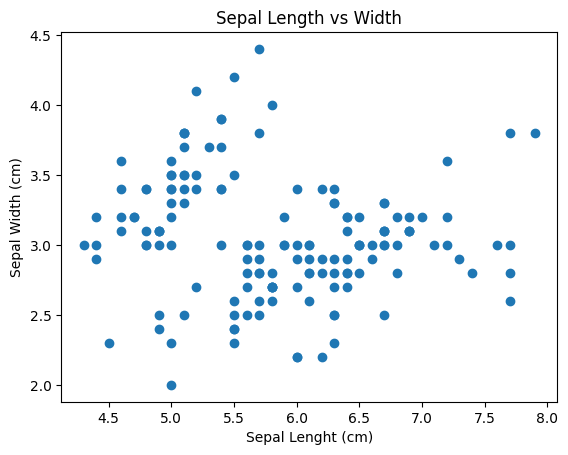

In [26]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='Sepal Lenght (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 


[Text(0.5, 0, 'Petal Lenght (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lenghts')]

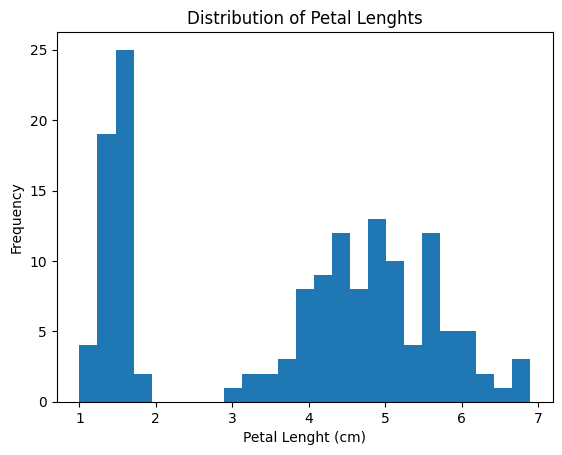

In [28]:
ax = plt.axes()
ax.hist(data.petal_length, bins=25)
ax.set(xlabel='Petal Lenght (cm)',
       ylabel= 'Frequency',
       title='Distribution of Petal Lenghts')

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for Pandas.


Text(0.5, 0, 'Size (cm)')

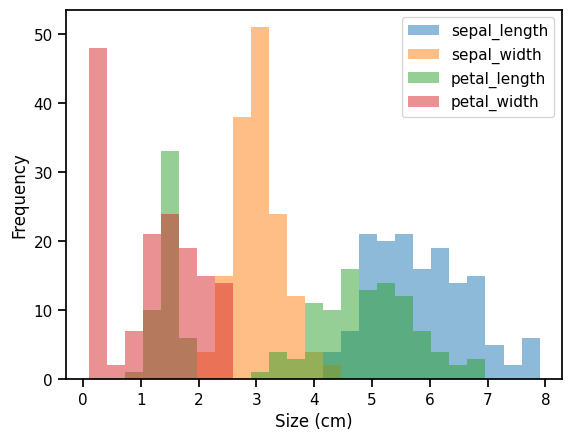

In [29]:
import seaborn as sns
sns.set_context('notebook')
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)')

### sns.set_context('notebook') <br>
Este comando configura el contexto de los gráficos generados. El contexto determina el tamaño relativo de los elementos de un gráfico (como texto, etiquetas, y marcadores) para adaptarlos a diferentes situaciones.<br>
- 'notebook' está diseñado para trabajar en entornos de notebooks (como Jupyter), con tamaños moderados y legibles.<br>
- 'paper': más compacto para informes o publicaciones.
- 'talk': elementos más grandes, ideales para presentaciones.
- 'poster': elementos aún más grandes, para gráficos a gran escala

### data.plot.hist: <br>
crea un histograma de las columnas numéricas del DataFrame data.<br>
### bins=25:<br>
define el número de intervalos (o barras) en el histograma. Aquí se divide el rango de datos en 25 categorías.<br>
### alpha=0.5:<br>
ajusta la transparencia de las barras del histograma. Un valor de 0.5 hace que las barras sean semitransparentes.

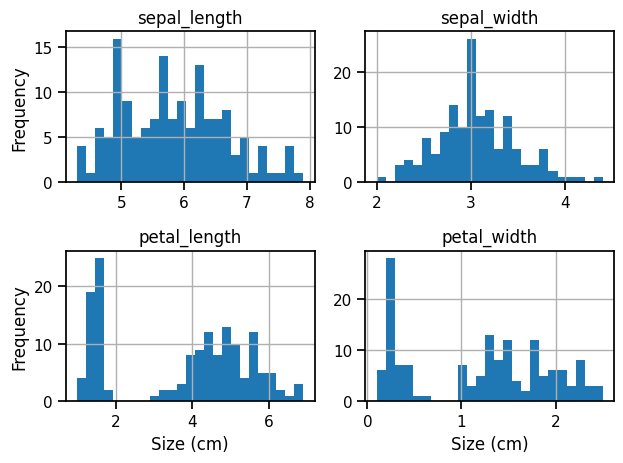

In [31]:
# Crear histogramas
axList = data.hist(bins=25)

# Iterar sobre los ejes en la cuadrícula
for i, ax in enumerate(axList.flatten()):
    nrows, ncols = axList.shape  # Filas y columnas de la cuadrícula
    row, col = divmod(i, ncols)  # Calcular fila y columna actuales
    
    # Verificar si está en la última fila
    if row == nrows - 1:
        ax.set_xlabel('Size (cm)')
    
    # Verificar si está en la primera columna
    if col == 0:
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- axList: Es una matriz de ejes (Axes) de matplotlib, donde cada eje contiene un histograma.<br>
- xList.flatten(): Convierte la matriz de ejes (axList) en una lista plana para iterar fácilmente sobre todos los subplots.<br>
- axList.shape: Devuelve el número de filas (nrows) y columnas (ncols) en la cuadrícula de subplots.<br>
- divmod(i, ncols): Calcula la fila (row) y columna (col) de cada subplot basado en su índice (i) y el número de columnas (ncols).<br>

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01#visualization-box).


array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

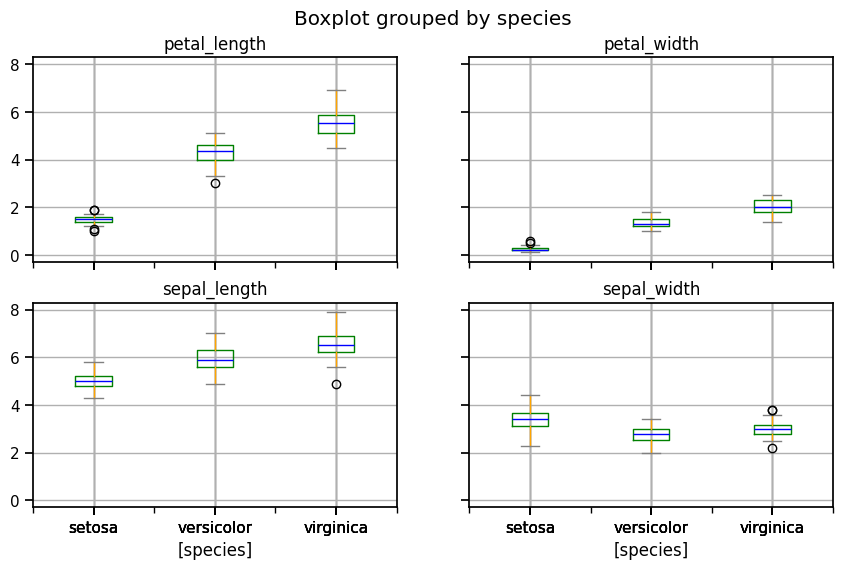

In [38]:
color = dict(boxes='Green', whiskers='Orange',
             medians='Blue', caps='Gray')
data.boxplot(color=color, by='species', figsize=(10,6))

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |


In [40]:
data_stack = (data
              # Cambia el índice del DataFrame para que sea la columna species
              .set_index('species')
              # Apila las columnas en una sola columna, transformando el DataFrame de formato ancho a largo.
              .stack()
              # Convierte el resultado de .stack() (que es una Serie) en un DataFrame
              .to_frame()
              # Restaura el índice jerárquico a columnas normales y agrega un nuevo índice numérico
              .reset_index()
              .rename(columns={0:'Size','level_1':'Measurement'}))
data_stack.head()

,species,Measurement,Size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


<Axes: xlabel='Measurement', ylabel='Size'>

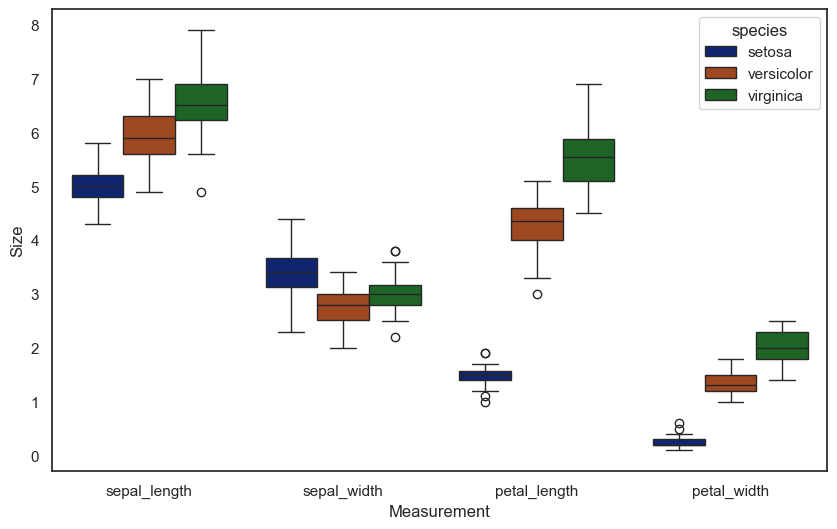

In [43]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f= plt.figure(figsize=(10,6))
sns.boxplot(x='Measurement', y= 'Size', hue='species', data=data_stack)

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.


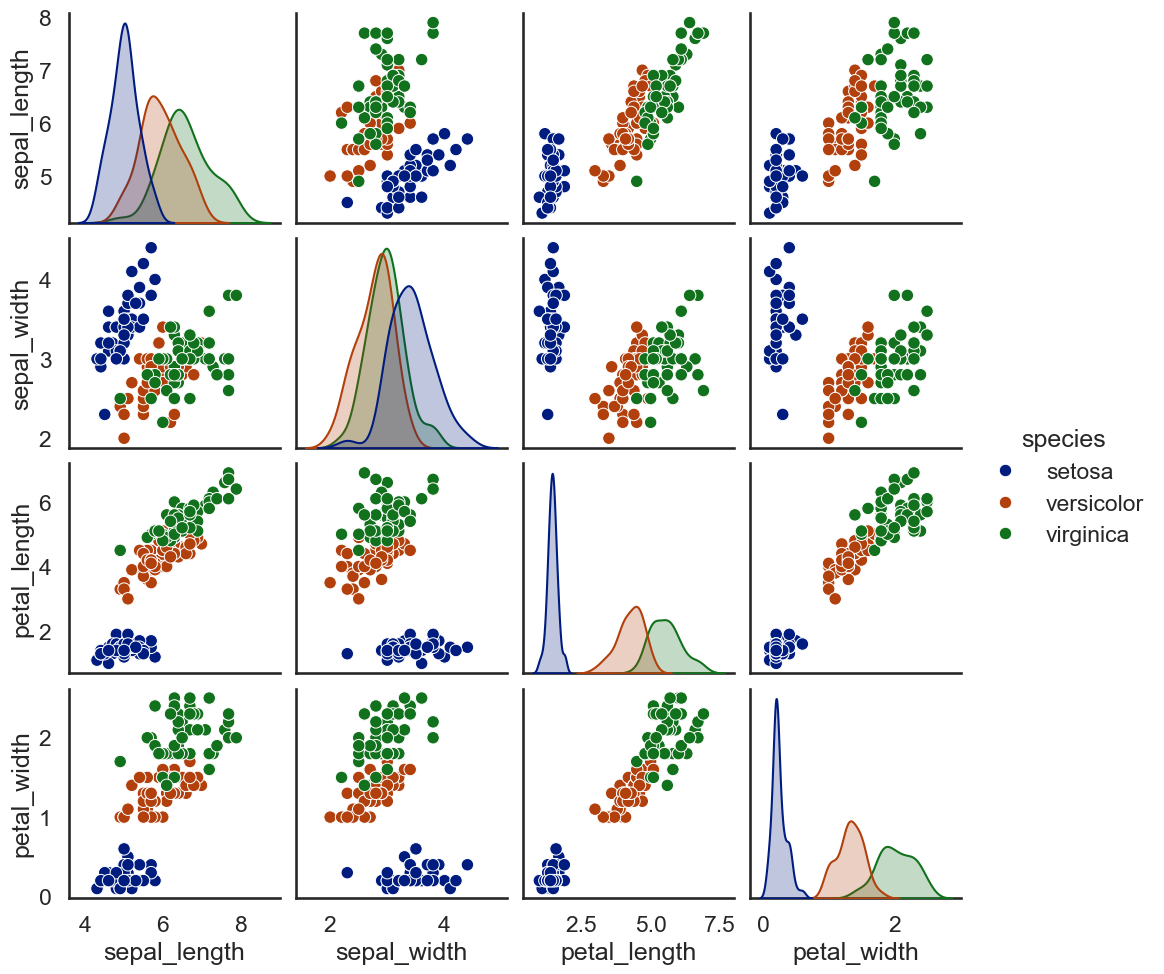

In [45]:
sns.set_context('talk')
sns.pairplot(data, hue='species')

---
### Machine Learning Foundation (C) 2020 IBM Corporation
